# ПРОЕКТ:
###### 0) Изучаете контекст датасета и придумываете бизнес-цель
###### 1) Делаете постановку задач на исследование (минимум 2 задачи, 1 под классфификацию/регрессию, 1 под кластеризацию (в крайнем случае делаем допущение что у нас нет Y) , )
###### 2) Оценка Датасета (pandas/np/statsmodel...)
###### 3) Подготовка данных
###### 4) Выполнение исследований ( в том числе с промежуточными итогами, визуализациями)
###### 5) Итоговые визуализации и выводы
###### 6) Предложения по развитию вашей работы

# 1. Кластеризация

В этом проекте мы будем работать с выложенными в общий доступ данными о социально-экономических факторах и факторах здравоохранения различных стран.

###### Наша цель: использовать имеющиеся данные для построения модели, которая поможет разделить страны на кластеры по уровню их развития.  
###### Для чего: 
HELP International - международная гуманитарная неправительственная организация, которая стремится бороться с нищетой и предоставлять жителям отсталых стран основные удобства и помощь во время и после катастроф и стихийных бедствий.

HELP International смогла собрать около 10 миллионов долларов, и теперь генеральному директору необходимо решить, как использовать эти деньги стратегически верно и эффективно. Итак, генеральный директор должен принять решение о выборе стран, которые больше всего нуждаются в помощи. Следовательно, наша задача как специалиста по обработке данных состоит в том, чтобы классифицировать страны, используя некоторые социально-экономические факторы и факторы здравоохранения, которые определяют общее развитие страны. После чего нужно предложить страны, на которых генеральному директору следует сосредоточиться больше всего.

In [1]:
import pandas as pd
import numpy as np

# Загружаем наш датасет с исходными данными
data = pd.read_csv("C:\\Users\\anna.nazarova\\Desktop\\Мага\\Матан\\ДЗ_1_Кластеризация\\Country-data_исх.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Итак, что мы можем сказать о нашем датасете?
Всего рассмотрено 167 стран, для каждой из которых представлены следующие 10 показателей:
* название страны (country)
* детская смертность (child_mort) - количество умерших детей в возрасте до 5 лет на 1000 рожденных живыми
* процент экспорта (exports) - экспорт товаров и услуг на душу населения. Указывается в процентах от ВВП на душу населения
* показатель здравоохранения (health) - общие расходы на здравоохранение на душу населения. Указывается в процентах от ВВП на душу населения
* процент импорта (imports) - импорт товаров и услуг на душу населения. Указывается в процентах от ВВП на душу населения
* доход на человека (income) - чистый доход на человека
* инфляция (inflation) - измерение ежегодных темпов роста общего ВВП
* продолжительность жизни (life_expec) - среднее количество лет, которое проживет новорожденный ребенок, если нынешние показатели смертности останутся прежними
* рождаемость (total_fer) - число детей, которые родились бы у каждой женщины, если бы нынешние показатели рождаемости по возрасту остались прежними
* ВВП (gdpp) - ВВП на душу населения. Рассчитывается как общий ВВП, деленный на общую численность населения

За исключением названия страны, которое в дальнейшем не будет участвовать в анализе, все показатели числовые, тип float и int. Дополнительных преобразований здесь не нужно.

Проверим данные на отсутствующие значения:

In [9]:
def missing_values_table(df):
        # Общее количество пропущенных значений
        mis_val = df.isnull().sum()
        
        # Процент пропущенных значений
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Таблица с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименовываем колонки
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Сортировка таблицы по проценту пропущенных элементов по убыванию
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Общая информация
        print ("В вашем датафрейме " + str(df.shape[1]) + " колонок.\n"      
            "Из них " + str(mis_val_table_ren_columns.shape[0]) +
              " колонок, содержит пропущенные значения.")
        
        # Возвращаем датафрейм с колонками, имеющими пропущенные значения
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

В вашем датафрейме 10 колонок.
Из них 0 колонок, содержит пропущенные значения.


,Missing Values,% of Total Values


Ура, пропущенных значений нет! Идем дальше, проверим на дубликаты.

In [16]:
a = len(data[data.duplicated()])
if a == 0:
    print('Дубликатов нет')
else:
    print('Дубликаты есть, их количество: ', a)

Дубликатов нет


In [3]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Посмотрим на основные статитические показатели по каждому столбцу.
На основании данной информации сразу можно сказать, что в дальнейшем необходимо будет провести масштабирование признаков, поскольку признаки измеряются в разных единицах, а значит покрывают разные диапазоны.

Теперь перейдем к исследованию распределения каждой переменной.

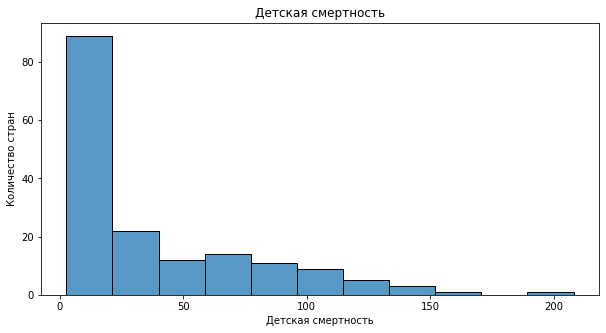

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
plt.title('Детская смертность')
plt.xlabel('Детская смертность'); plt.ylabel('Количество стран')
ax = sns.histplot(data['child_mort'])

Более 50% стран имеют низкий уровень детской смертности, что не может не радовать. Однако исследование показало, что есть и выбросы - страны-исключения с критически высоким уровнем детской смертности. Данные страны не будут исключены из дальнейшего исследования, поскольку детская смертность - очень важный показатель развития страны, и страны с таким высоким уровнем детской смертности могут в первую очередь нуждаться в помощи в рамках нашей задачи.

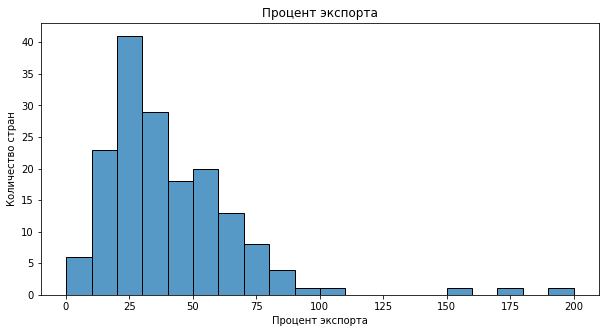

In [4]:
plt.figure(figsize=(10,5))
plt.title('Процент экспорта')
plt.xlabel('Процент экспорта'); plt.ylabel('Количество стран')
ax = sns.histplot(data['exports'])

Распределение похоже на нормальное за исключением пары выбросов, для которых уровень экспорта очень высокий. Отдельно экспорт рассматривать не имеет смысла, об уровне развития страны говорит ее уровень экспорта и импорта вместе, поэтому перейдем к дальнейшему исследованию импорта.

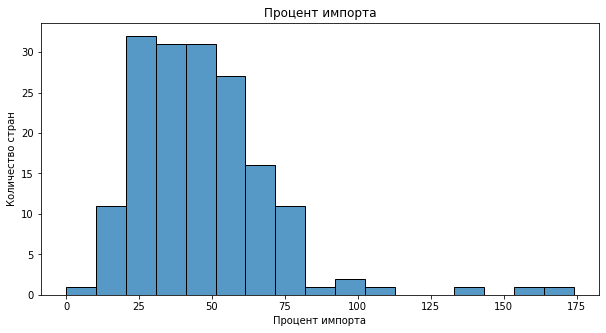

In [5]:
plt.figure(figsize=(10,5))
plt.title('Процент импорта')
plt.xlabel('Процент импорта'); plt.ylabel('Количество стран')
ax = sns.histplot(data['imports'])

Распределение похоже на нормальное за исключением пары выбросов, похожих на выбросы в исследовании экспорта. Я провела дополнительное исследование и убедилась, что страны-выбросы с высоким уровнем экспорта - это те же страны в импорте: Люксенбург, Мальта и Сингапур. Таким образом, для них чистый экспорт, который равен разнице между экспортом и импортом, не будет отличаться от остальных стран, для которых эти показатели значительно ниже. Поэтому выбросы и там, и там оставляем. 

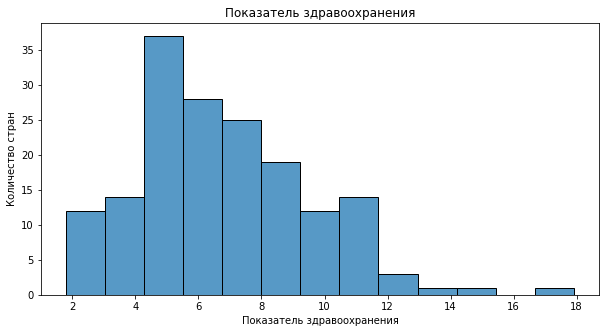

In [6]:
plt.figure(figsize=(10,5))
plt.title('Показатель здравоохранения')
plt.xlabel('Показатель здравоохранения'); plt.ylabel('Количество стран')
ax = sns.histplot(data['health'])

Нормальное распределение + пара стран с высоким уровнем затрат на здравоохранение (США и Микронезия, которой помогает США).

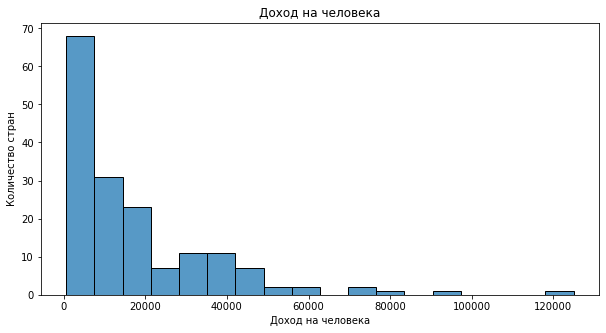

In [7]:
plt.figure(figsize=(10,5))
plt.title('Доход на человека')
plt.xlabel('Доход на человека'); plt.ylabel('Количество стран')
ax = sns.histplot(data['income'])

Опять же видны страны-исключения с очень высоким уровнем дохода населения - Катар (нефть), Люксенбург, Сингапур

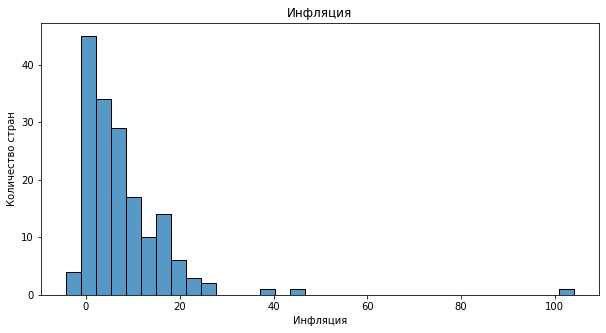

In [8]:
plt.figure(figsize=(10,5))
plt.title('Инфляция')
plt.xlabel('Инфляция'); plt.ylabel('Количество стран')
ax = sns.histplot(data['inflation'])

Нормальное распределение + страны с очень высоким уровнем инфляции (Нигерия, Венесуэла). На них стоит в дальнейшем обратить внимание.

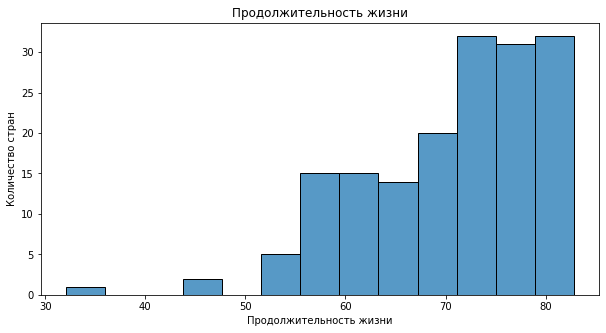

In [9]:
plt.figure(figsize=(10,5))
plt.title('Продолжительность жизни')
plt.xlabel('Продолжительность жизни'); plt.ylabel('Количество стран')
ax = sns.histplot(data['life_expec'])

Страны с минимальным уровнем жизни - ЦАР, Гаити. На них стоит в дальнейшем обратить внимание.

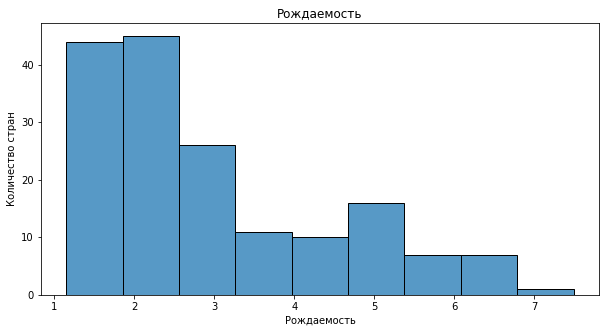

In [10]:
plt.figure(figsize=(10,5))
plt.title('Рождаемость')
plt.xlabel('Рождаемость'); plt.ylabel('Количество стран')
ax = sns.histplot(data['total_fer'])

Для беднейших стран уровень рождаемости обычно очень высок, например, 7,49 - это Республика Нигер - одна из самых бедных стран мира.

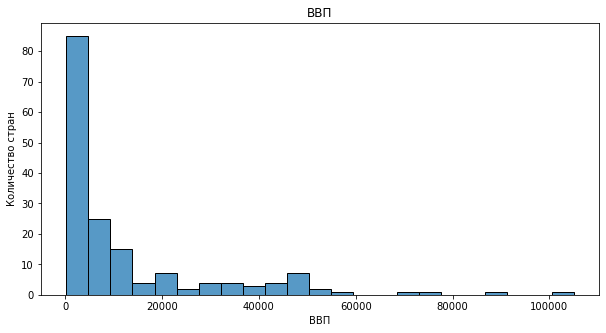

In [11]:
plt.figure(figsize=(10,5))
plt.title('ВВП')
plt.xlabel('ВВП'); plt.ylabel('Количество стран')
ax = sns.histplot(data['gdpp'])

Здесь выбросы - это страны с высоким уровнем развития (Люксенбург, Норвегия, Швейцария)

Таким образом, исследование распределения признаков показало, что выбросы для нашей задачи могут быть очень информативны и могут сигнализировать о том, что именно этим странам в будущем нужно будет оказать помощь (высокая детская смертность, высокая рождаемость, низкая продолжительность жизни, высокая инфляция). Выбросы удалять не будем.

Перейдем к исследованию взаимосвязей между признаками и рассмотрим коэффициент корреляции Пирсона.

<AxesSubplot:>

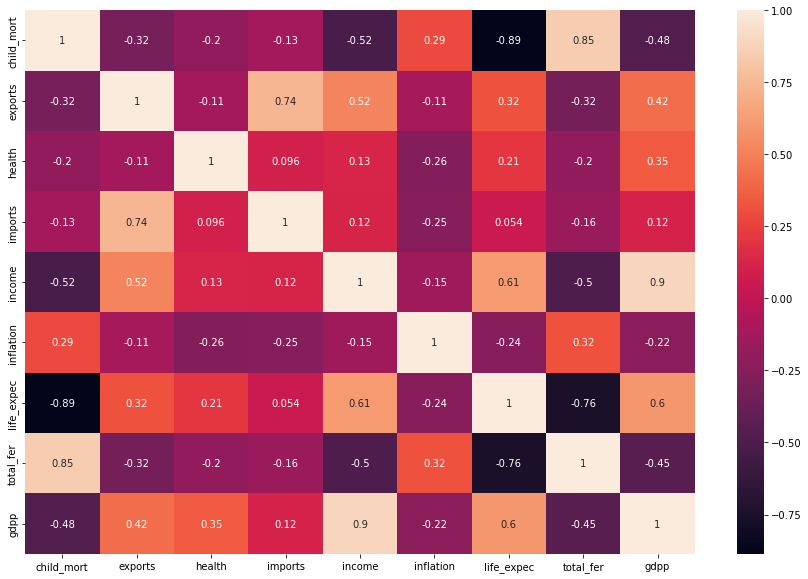

In [4]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(method='pearson', min_periods=1),annot=True)

Признаки, которые сильно коррелируют друг с другом, называются коллинеарными. Удаление одной переменной в таких парах признаков часто помогает модели обобщать и быть более интерпретируемой.

Пары с высокой корреляцией:
* продолжительность жизни - детская смертность
* рождаемость - детская смертность 
* ВВП - доход на человека

Поскольку признаков не так уж и много, удалим те, которые в паре с другим признаком дают коэффициент корреляции более 0,8.

In [5]:
dataset_reduced = data.drop(['life_expec','total_fer','income'], axis =1)
dataset_reduced.head()

,country,child_mort,exports,health,imports,inflation,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,9.44,553
1,Albania,16.6,28.0,6.55,48.6,4.49,4090
2,Algeria,27.3,38.4,4.17,31.4,16.10,4460
3,Angola,119.0,62.3,2.85,42.9,22.40,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,1.44,12200


Перейдем к масштабированию признаков

In [6]:
from sklearn.preprocessing import MinMaxScaler

dataset = dataset_reduced.drop(['country'], axis =1) 
columns = dataset.columns
scaler = MinMaxScaler()
rescaled_dataset_minmax = scaler.fit_transform(dataset) 
df_minmax = pd.DataFrame(data=rescaled_dataset_minmax , columns = columns)
df_minmax.head()

,child_mort,exports,health,imports,inflation,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.126144,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.080399,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.187691,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.245911,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.052213,0.114242


Теперь все значения в диапазоне от 0 до 1.

###### Переходим к кластеризации

Выбранный метод - k-means. 

Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров - n. 

Далее случайным образом из входных данных выбираются n элементов выборки, в соответствие которым ставятся три кластера, в каждый из которых теперь включено по одной точке, каждая при этом является центроидом этого кластера.

После чего ищем ближайшего соседа текущего центроида. Добавляем точку к соответствующему кластеру и пересчитываем положение центроида с учетом координат новых точек.  Алгоритм заканчивает работу, когда координаты каждого центроида перестают меняться. Центроид каждого кластера в результате представляет собой набор значений признаков, описывающих усредненные параметры выделенных классов.

Начнем с определения оптимального числа кластеров, и для этого используем метод "локтя".

C:\Users\anna.nazarova\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


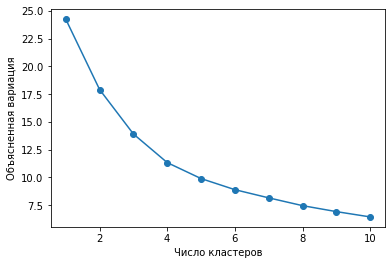

In [7]:
from sklearn.cluster import KMeans

sse = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(df_minmax)
    sse.append(km.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Объясненная вариация')
plt.show()

На графике видно, что оптимальное число кластеров - это что-то среднее между 3 и 4. Мы как исследователи самостоятельно принимаем решения, опираясь на данные. Поэтому для дальнейшей кластеризации я возьму 3 кластера - логически предполагаю деление стран на отсталые, развивающиеся и развитые.

Перейдем к самому методу:

In [8]:
km = KMeans (
    n_clusters = 3, # количество кластеров/центроидов для создания
    init = 'random', # ‘random’: выбор 3 наблюдений (строк) случайным образом из данных для начальных центроидов
    n_init = 10, # по умолчанию. Это количество раз, когда алгоритм k-средних будет выполняться с разными начальными значениями центроида
    max_iter = 300, # по умолчанию. Это максимальное количество итераций алгоритма k-средних для одного запуска.
    tol = 1e-4, # по умолчанию. Это относительный допуск по отношению к норме Фробениуса разницы в центрах кластеров двух последовательных итераций для объявления сходимости.
    random_state = 0 # по умолчанию. Определяет генерацию случайных чисел для инициализации центроида.
)

In [9]:
y_predicted_minmax = km.fit_predict(df_minmax) 
y_predicted_minmax

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 0, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [10]:
km.cluster_centers_

array([[0.00879816, 0.28378824, 0.49438427, 0.29456041, 0.05346086,
        0.4446967 ],
       [0.09180034, 0.21670363, 0.2757319 , 0.27837763, 0.10998118,
        0.07690493],
       [0.45532   , 0.13001665, 0.27084864, 0.2332736 , 0.14913237,
        0.01224903]])

Добавим столбец с номером кластера к данным:

In [11]:
df_minmax['cluster'] = y_predicted_minmax
df_minmax.head()

,child_mort,exports,health,imports,inflation,gdpp,cluster
0,0.426485,0.049482,0.358608,0.257765,0.126144,0.003073,2
1,0.068160,0.139531,0.294593,0.279037,0.080399,0.036833,1
2,0.120253,0.191559,0.146675,0.180149,0.187691,0.040365,1
3,0.566699,0.311125,0.064636,0.246266,0.245911,0.031488,2
4,0.037488,0.227079,0.262275,0.338255,0.052213,0.114242,1


Если наземные метки истинности неизвестны, для оценки модели можно использовать индекс Дэвиса-Болдина (sklearn.metrics.davies_bouldin_score), где более низкий индекс Дэвиса-Болдина относится к модели с лучшим разделением между кластерами.

Этот индекс означает среднее «сходство» между кластерами, где сходство — это мера, которая сравнивает расстояние между кластерами с размером самих кластеров.

Ноль — это наименьший возможный результат. Значения, близкие к нулю, указывают на лучшее разделение.

In [13]:
from sklearn.metrics import davies_bouldin_score
labels = km.labels_
print(davies_bouldin_score(df_minmax, labels))

0.47764183923014425


Если наземные метки достоверности неизвестны, оценка должна выполняться с использованием самой модели. Коэффициент силуэта (sklearn.metrics.silhouette_score) является примером такой оценки, где более высокий показатель коэффициента силуэта относится к модели с лучше определенными кластерами. Коэффициент силуэта определяется для каждого образца и состоит из двух баллов:

a : Среднее расстояние между образцом и всеми другими точками того же класса.
b : Среднее расстояние между образцом и всеми другими точками в следующем ближайшем кластере .
Тогда коэффициент силуэта s для одного образца определяется как: s = (b - a)/max(a,b) 

Коэффициент силуэта для набора образцов дается как среднее значение коэффициента силуэта для каждого образца.

In [14]:
from sklearn.metrics import calinski_harabasz_score
print(calinski_harabasz_score(df_minmax, labels))

476.3765926704043


Если наземные метки достоверности неизвестны, индекс Калински-Харабаса (sklearn.metrics.calinski_harabasz_score) — также известный как критерий отношения дисперсии — можно использовать для оценки модели, где более высокий балл Калински-Харабаса относится к модели с более определенными кластерами.

Индекс представляет собой отношение суммы дисперсии между кластерами и дисперсии внутри кластера для всех кластеров (где дисперсия определяется как сумма квадратов расстояний):

In [15]:
from sklearn.metrics import silhouette_score
print(silhouette_score(df_minmax, labels))

0.6905443808895603


Посмотрим на графиках парных зависимостей между признаками, как распределены данные в соответствующие кластеры:

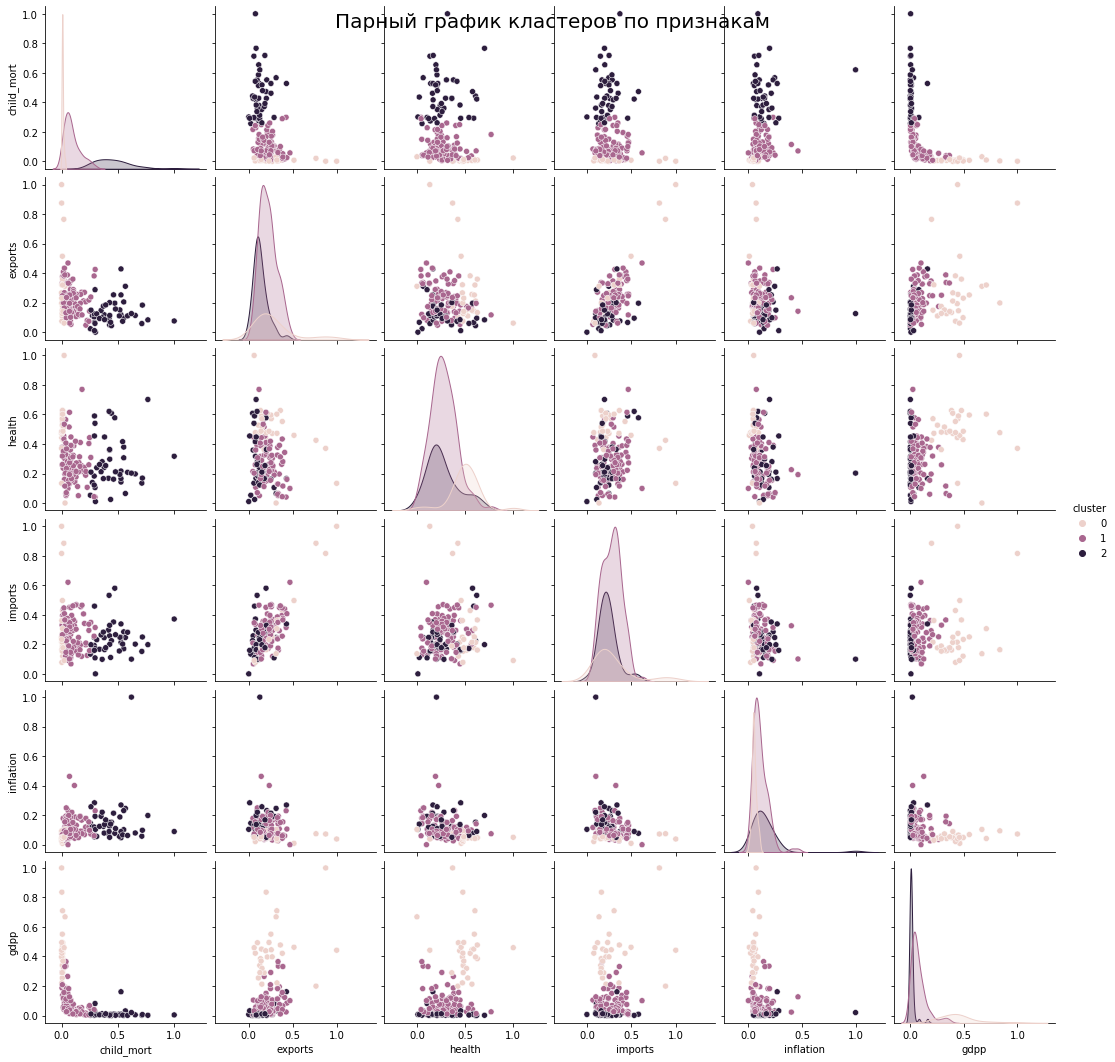

In [20]:
sns.pairplot(df_minmax, hue="cluster")

plt.suptitle('Парный график кластеров по признакам', 
             size = 20);

Для части графиков хорошо видно, что кластеры логически выделены верно. Например, посмотрим на зависимость детской смертности и ВВП:
* в кластер 0 попали страны с высоким ВВП и минимальным уровнем детской смертности
* в кластер 1 - страны с промежуточными значениями, т.е. с более низким ВВП и более высокой смертностью относительно стран из кластера 0, и при этом с более высоким ВВП и более низкой смертностью относительно стран из кластера 2
* в кластер 2 - страны с высоким уровнем детской смертности и минимальным значением ВВП

На некоторых графиках кластеры выделены не очевидно, происходит сильное перекрывание.
    

Поскольку нам интересны реальные значения признаков, вернемся к ним и добавим номер кластера в качества дополнительного столбца.

In [19]:
dataset_reduced['cluster'] = y_predicted_minmax
dataset_reduced.head()

,country,child_mort,exports,health,imports,inflation,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,9.44,553,2
1,Albania,16.6,28.0,6.55,48.6,4.49,4090,1
2,Algeria,27.3,38.4,4.17,31.4,16.10,4460,1
3,Angola,119.0,62.3,2.85,42.9,22.40,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,1.44,12200,1


Посмотрим в таблице средние значения каждого признака для каждого кластера:

In [20]:
clusters_table = pd.pivot_table(dataset_reduced, index=['cluster'])
clusters_table

,child_mort,exports,gdpp,health,imports,inflation
cluster,,,,,,
0,4.407143,56.835714,46821.428571,9.764643,51.300000,1.575000
1,21.455789,43.426105,8288.252632,6.246526,48.485263,7.691063
2,96.122727,26.098159,1514.318182,6.167955,40.640134,11.927614


Рассмотрим подробнее страны, входящие в один кластер, и их характеристики:

* кластер 0

Страны этого кластеры отличаются низким уровнем детской смертности, высоким процентом экспорта и импорта, высоким значеним ВВП и затрат на здравоохранение, а также очень низкой инфляцией. Все признаки говорят о том, что это развитые страны. Посмотрим на их список:

In [98]:
cluster_0 = data.loc[dataset_reduced['cluster'] == 0]
cluster_0.country.unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Luxembourg', 'Malta', 'Netherlands',
       'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'United Kingdom',
       'United States'], dtype=object)

Действительно, в этот список попали наиболее развитые страны миры, в чем можно убедиться, почитав ту же википедию. Это страны Северной Америки, Европы, Океании и Азии.

* кластер 1

Страны этого кластеры отличаются промежуточными значениями по всем признакам относительно кластеров 0 и 2. Все признаки говорят о том, что это развивающиеся страны. Посмотрим на их список:

In [99]:
cluster_1 = data.loc[dataset_reduced['cluster'] == 1]
cluster_1.country.unique()

array(['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei',
       'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia',
       'Congo, Rep.', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia',
       'Fiji', 'Georgia', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Libya',
       'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius',
       'Micronesia, Fed. Sts.', 'Moldova', 'Mongolia', 'Montenegro',
       'Morocco', 'Namibia', 'Nepal', 'Oman', 'Panama', 'Paraguay',
       'Peru', 'Philippines', 'Poland', 'Romania', 'Russia', 'Samoa',
       'Saudi Arabia', 'Se

В кластер 1 попали страны среднего уровня развития, это наиболее многочисленный кластер. Страны этого кластера расположены по всей Южной Америке, в некоторых частях Африки, Европы и Азии.

* кластер 2

Страны этого кластера отличаются низким уровнем развития по всем показателям, посмотрим на их список:

In [100]:
cluster_2 = data.loc[dataset_reduced['cluster'] == 2]
cluster_2.country.unique()

array(['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Comoros',
       'Congo, Dem. Rep.', "Cote d'Ivoire", 'Equatorial Guinea',
       'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Haiti', 'India', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique',
       'Myanmar', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Uganda', 'Yemen', 'Zambia'], dtype=object)

В эту группу попали наименее развитые страны, большинство из которых являются странами Африки. Именно на эту группу стран в первую очередь нужно обратить внимание при оказании финансовой помощи.

# 2. Классификация

На том же датасете про страны попробуем осуществить задачу классификации. Предположим, что определенный нами номер кластера - истина и уже известен. 

Задача следующая: определить набор фичей, которые помогут предсказать в дальнейшем уровень развития страны.

Исходный датафрейм:

In [21]:
dataset_reduced.head()

,country,child_mort,exports,health,imports,inflation,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,9.44,553,2
1,Albania,16.6,28.0,6.55,48.6,4.49,4090,1
2,Algeria,27.3,38.4,4.17,31.4,16.10,4460,1
3,Angola,119.0,62.3,2.85,42.9,22.40,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,1.44,12200,1


Напоминание:
* кластер 0 - развитые страны
* кластер 1 - развивабщиеся
* кластер 2 - отсталые

В качестве фич рассмотрим все присущетсвующие признаки, цель - кластер.

Рассмотрим 3 метода классификации и определим наиболее точный: 
* метод ближайших соседей
* метод опорных векторов
* метод случайного леса

Начинаем с разделения нашей выборки на учебную и тестовую:

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

data = dataset_reduced.sample(frac=1)
X = data[['child_mort', 'exports', 'health', 'imports', 'inflation', 'gdpp']]
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [40]:
# Функция для вычисления средней абсолютной ошибки
def mae(y_test, y_pred):
    return np.mean(abs(y_test - y_pred))

# вводит модель, обучает модель и оценивает модель на тестовом наборе
def fit_and_evaluate(model):
    
    # Учим модель
    model.fit(X_train, y_train)
    
    # Прогнозируем и оцениваем
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Возвращает показатель производительности
    return model_mae

In [41]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_mae = fit_and_evaluate(knn)

print('KNeighborsClassifier Performance on the test set: MAE = %0.4f' % knn_mae)

KNeighborsClassifier Performance on the test set: MAE = 0.1765


In [42]:
svm = SVC(kernel='linear')
svm_mae = fit_and_evaluate(svm)

print('Support Vector Machine Performance on the test set: MAE = %0.4f' % svm_mae)

Support Vector Machine Performance on the test set: MAE = 0.1569


In [45]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl_mae = fit_and_evaluate(random_forest_cl)

print('Random Forest Classifier Performance on the test set: MAE = %0.4f' % random_forest_cl_mae)

Random Forest Classifier Performance on the test set: MAE = 0.0392


При этом запуске точнее оказался метод случайного леса (но бывало и по-другому). Предскажем кластер страны, которая не участвовала в нашем исследовании:

In [48]:
child_mort = 60
exports = 20
health = 5
imports = 15
inflation = 15
gdpp = 3000

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
new_country = model.predict([[child_mort, exports, health, imports, inflation, gdpp]])
new_country

array([2])

Посмотрим, какие признаки наиболее важны для данного метода:

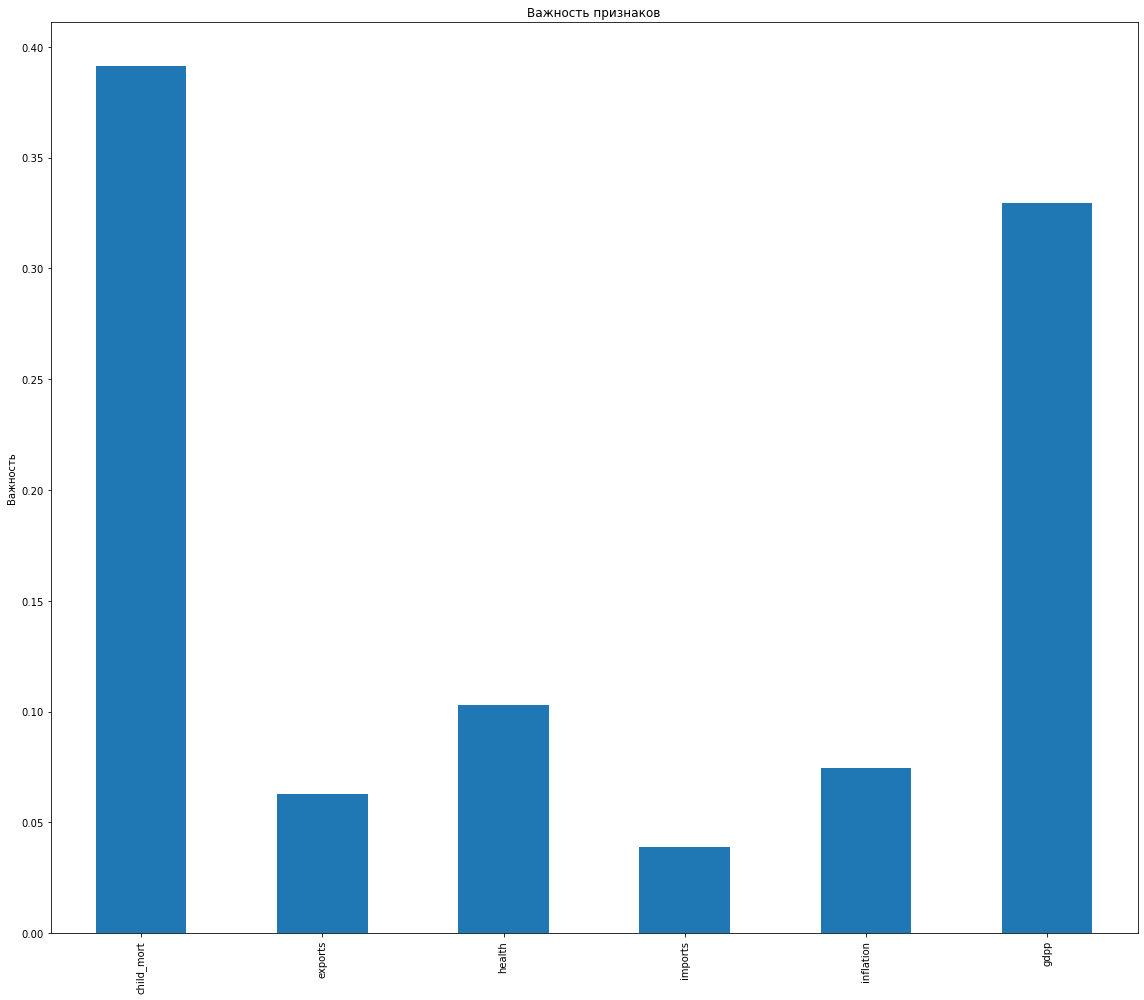

In [31]:
random_forest_cl = RandomForestClassifier(n_estimators=20)
random_forest_cl.fit(X_train, y_train)
random_forest_cl_imp = pd.Series(random_forest_cl.feature_importances_,
                         X_train.columns)

fig, ax = plt.subplots(figsize=(16,14))
random_forest_cl_imp.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()

Можно сделать вывод, что максимальный вклад в предсказание вносят показатели детской смертности и ВВП

In [50]:
X = data[['child_mort', 'gdpp']]
y = data['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

child_mort = 60
exports = 20
health = 5
imports = 15
inflation = 15
gdpp = 3000

model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
new_country = model.predict([[child_mort, gdpp]])
new_country

array([1])

Однако как показывает пример выше, оставив только две фичи, предсказанный кластер меняется - страна попадает в группу к развивающимся, что неверно по полному условию.

Таким образом, все-таки совокупность признаков правильно определяет уровень развития страны.

# Выводы:

Решив задачу кластеризации, нам удалось выделить группы стран по их развитию и определить наиболее нуждающиеся в помощи страны. 
Задача классификации позволяет предсказать кластер для страны, ранее не участвоващей в анализе. Таким образом, можно происследовать оставшиеся страны и, возможно, дополнить список стран, которым необходима финансовая помощь.